<a href="https://colab.research.google.com/github/Freakboy123/ASL-words-translator/blob/main/data_augmentation/media_pipe_data_aug.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from math import sin, cos

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
# Get all labels
names = []
for dir in os.listdir("/Users/aly/Documents/Programming/Apps/Machine Learning/ASL Converter/training_models/mediapipe/reformatting-the-data/data_25_labels"):
    if dir !=  '.DS_Store':
        names.append(dir)
names

['research',
 'hear',
 'music',
 'brother',
 'ocean',
 'many',
 'i love you',
 'dog',
 'polite',
 'milk',
 'bookstore',
 'doctor',
 'i',
 'classroom',
 'focus',
 'money',
 'coffee',
 'book',
 'phone',
 'chicken',
 'photographer',
 'hamburger',
 'good morning',
 'open',
 'door']

In [ ]:
test_arr = np.array([[1,2,3,4],[5,6,7,8]], dtype=np.float32)
# test_arr[:,:2]
origin = np.mean(test_arr[:,:2], axis=0)
test_arr[:,:2] -= origin
origin, test_arr

(array([3., 4.], dtype=float32),
 array([[-2., -2.,  3.,  4.],
        [ 2.,  2.,  7.,  8.]], dtype=float32))

In [ ]:
test_arr[:,2] = 1
test_arr

array([[-2., -2.,  1.,  4.],
       [ 2.,  2.,  1.,  8.]], dtype=float32)

In [ ]:
test_arr[:, 1]

array([-2.,  2.], dtype=float32)

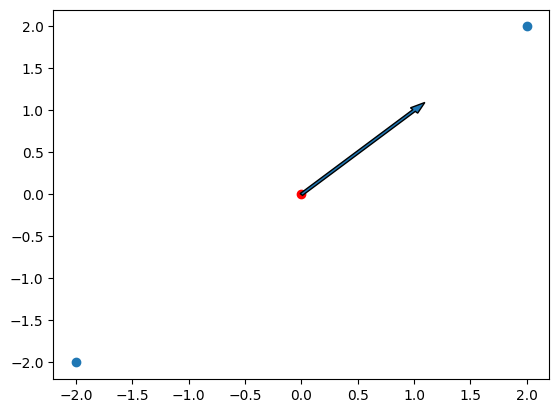

In [ ]:
plt.scatter(test_arr[:,0], test_arr[:, 1])
plt.scatter(0, 0, c="red")
plt.arrow(0,0,1,1, width=0.03)
plt.show()

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ASL_data_aug/media_pipe_data.csv")
df

FileNotFoundError: ignored

In [ ]:
#test

frame = df.iloc[0].to_numpy()
frame = frame.reshape((75, 4))
frame[0]
# new_frame = rotate(frame, 5)
# print(new_frame[0])
# print(frame[0])

array([ 0.55099976,  0.13720125, -0.38962263,  0.99933296])

In [ ]:
all_frames = df.to_numpy().reshape((70, 75, 4))
all_frames[0][0]

array([ 0.55099976,  0.13720125, -0.38962263,  0.99933296])

In [ ]:
def change_origin(frame):
  new_origin = np.mean(frame[:,:2], axis=0)
  # print(new_origin.shape)
  new_frame = np.copy(frame)
  new_frame[:,:2] -= new_origin
  return frame, new_frame 

In [ ]:
def visualize_rotation(func):

  def wrap(*args, **kwargs):
    original_frame, new_frame = func(*args, **kwargs)
    plt.scatter(original_frame[:, 0], original_frame[:, 1], c="blue", label="original_data")
    plt.scatter(new_frame[:, 0], new_frame[:, 1], c="red", label="new data")
    plt.scatter(0, 0, c="black")
    plt.annotate("origin", (0,0))
    plt.arrow(0, 0, original_frame[0][0], original_frame[0][1], length_includes_head=True, color="blue", head_width=0.03)
    plt.arrow(0, 0, new_frame[0][0], new_frame[0][1], length_includes_head=True, color="red", head_width=0.03)
    plt.legend()
    return original_frame, new_frame

  return wrap

In [ ]:
def visualize(frame):
    coordsX = []
    coordsY = []
    for i in range(frame.shape[0]):
        coordsX.append((frame[i][0]))
        coordsY.append((frame[i][1]))
    plt.scatter(coordsX, coordsY)


In [ ]:
@visualize_rotation
def rotate(frame, angle, origin=[0, 0]):
    normalized_frame = change_origin(frame)
    angle_rad = math.radians(angle)
    new_frame = np.copy(frame)
    rotation_matrix = np.array([[cos(angle_rad), -sin(angle_rad)], [sin(angle_rad), cos(angle_rad)]])
    for i in range(len(new_frame)):
        new_frame[i][:2] = np.matmul(rotation_matrix, new_frame[i][:2])
    return frame, new_frame

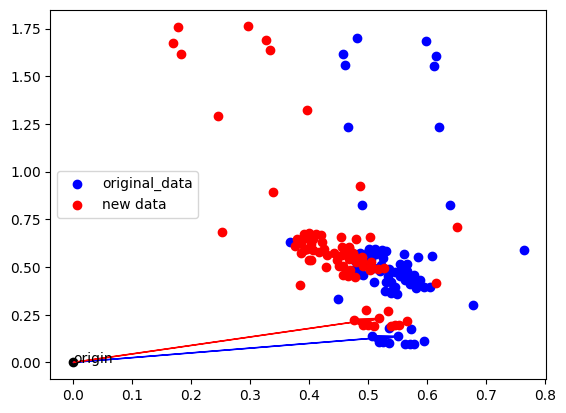

In [ ]:
#rotation without changing origin
_, f1 = rotate(all_frames[0], 10)

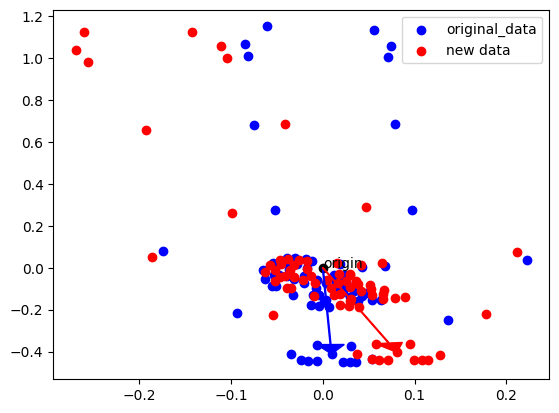

In [ ]:
_, frame = change_origin(all_frames[0])
_, _=rotate(frame, 10)

In [ ]:
class VectorTransformation():

  def __init__(self, center_data=False, translation_x=0, translation_y=0, rotation_angle=0, 
               shear_x=0, shear_y=0, scaling_x=1, scaling_y=1, reflection=False):
    self.center = center_data
    self.tx = translation_x
    self.ty = translation_y
    self.angle = math.radians(rotation_angle)
    self.shx = shear_x
    self.shy = shear_y
    self.scale_x = scaling_x
    self.scale_y = scaling_y
    self.reflect = reflection

  def translation_matrix(self):
    return np.array([[1, 0, self.tx],
                         [0, 1, self.ty],
                         [0, 0, 1]])

  def rotation_matrix(self):
    return np.array([[cos(self.angle), -sin(self.angle), 0], 
                       [sin(self.angle), cos(self.angle), 0],
                       [0, 0, 1]])

  def shearx_matrix(self):
    return np.array([[1, self.shx, 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
  def sheary_matrix(self):
    return np.array([[1, 0, 0],
                     [self.shy, 1, 0],
                     [0, 0, 1]])
    
  def scaling_matrix(self):
    return np.array([[self.scale_x, 0, 0],
                     [0, self.scale_y, 0], 
                     [0, 0, 1]])
    
  def reflection_matrix(self):
    return np.array([[1, 0, 0],
                     [0, int(self.reflect), 0], 
                     [0, 0, 1]])
    
  def change_origin(self, frame):
    new_origin = np.mean(frame[:,:2], axis=0)
    new_frame = np.copy(frame)
    new_frame[:,:2] -= new_origin
    return new_frame 

In [ ]:
def add_to_class(Class):  
    def wrapper(obj):
        setattr(Class, obj.__name__, obj)
    return wrapper

In [ ]:
@add_to_class(VectorTransformation)
def transform(self, frame):
    new_frame = np.copy(frame)
    new_frame[:, 2] = 1

    #centering
    if self.center:
      new_frame = self.change_origin(frame)

    for i in range(len(new_frame)):
        new_frame[i][:3] = np.matmul(self.translation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.rotation_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.shearx_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.sheary_matrix(), new_frame[i][:3])
        new_frame[i][:3] = np.matmul(self.scaling_matrix(), new_frame[i][:3])

    new_frame[:, 2] = frame[:, 2]
        
    return new_frame


In [ ]:
@add_to_class(VectorTransformation)
def visualize_change(self, original_frame, new_frame):
    plt.title(f"translation: ({self.tx}, {self.ty})\nrotation: {self.angle},\n shear: ({self.shx}, {self.shy})\n scaling: ({self.scale_x}, {self.scale_y})")
    plt.scatter(original_frame[:, 0], original_frame[:, 1], c="blue", label="original_data")
    plt.scatter(new_frame[:, 0], new_frame[:, 1], c="red", label="new data")
    plt.scatter(0, 0, c="black")
    plt.annotate("origin", (0,0))
    plt.arrow(0, 0, original_frame[0][0], original_frame[0][1], length_includes_head=True, color="blue", head_width=0.03)
    plt.arrow(0, 0, new_frame[0][0], new_frame[0][1], length_includes_head=True, color="red", head_width=0.03)
    plt.legend()

In [ ]:
data_aug = VectorTransformation(shear_x=2)
new_frame = data_aug.transform(all_frames[0])
new_frame

array([[ 8.25402260e-01,  1.37201250e-01, -3.89622629e-01,
         9.99332964e-01],
       [ 7.56486833e-01,  9.67129469e-02, -3.65614057e-01,
         9.98801112e-01],
       [ 7.64364183e-01,  9.65787172e-02, -3.65343988e-01,
         9.98705387e-01],
       [ 7.71573365e-01,  9.68367457e-02, -3.65327060e-01,
         9.98981297e-01],
       [ 7.38781452e-01,  1.01786137e-01, -3.63700062e-01,
         9.98838007e-01],
       [ 7.35041246e-01,  1.04785852e-01, -3.63448590e-01,
         9.98432696e-01],
       [ 7.35662326e-01,  1.08696871e-01, -3.63621444e-01,
         9.98769104e-01],
       [ 8.23204294e-01,  1.14165075e-01, -1.90830350e-01,
         9.99564707e-01],
       [ 7.78396070e-01,  1.35998070e-01, -1.71027124e-01,
         9.99061644e-01],
       [ 9.22227383e-01,  1.74995661e-01, -3.22979748e-01,
         9.99876261e-01],
       [ 8.99934113e-01,  1.82146072e-01, -3.18109989e-01,
         9.99800026e-01],
       [ 1.27879679e+00,  3.00477087e-01, -1.20973565e-01,
      

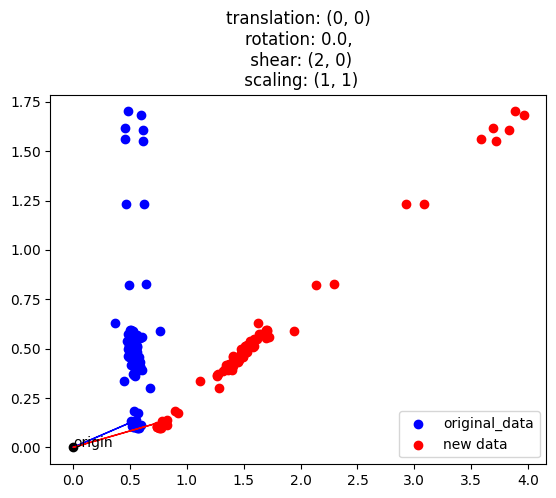

In [ ]:
data_aug.visualize_change(all_frames[0], new_frame)

##random funcitons


In [1]:
import random 

@add_to_class(VectorTransformation)
def translation_matrix(self):
    return np.array([[1, 0, random.uniform(0, self.tx)],
                         [0, 1, self.ty],
                         [0, 0, 1]])

@add_to_class(VectorTransformation)
def rotation_matrix(self):
    return np.array([[cos(random.uniform(0, self.angle)), -sin(random(0,self.angle)), 0], 
                    [sin(random.uniform(0, self.angle)), cos(random.uniform(0, self.angle)), 0],
                    [0, 0, 1]])
  
@add_to_class(VectorTransformation)
def shearx_matrix(self):
    return np.array([[1, random.uniform(0, self.shx), 0],
                     [0, 1, 0], 
                     [0, 0, 1]])
    
@add_to_class(VectorTransformation)
def sheary_matrix(self):
  return np.array([[1, 0, 0],
                  [random.uniform(0, self.shy), 1, 0],
                  [0, 0, 1]])
    
@add_to_class(VectorTransformation)
def scaling_matrix(self):
  return np.array([[random.uniform(1, self.scale_x), 0, 0],
                  [0, random(1, self.scale_y), 0], 
                  [0, 0, 1]])

NameError: ignored

In [ ]:
@add_to_class(VectorTransformation)
def random_transform()